In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
# from os import listdir
# from os.path import isfile, join
# import os
from sklearn.linear_model import LinearRegression

# os.chdir('EDA')
# os. chdir('../Raw_data')
data_dir = "."

Importing data for certain state and range of years

In [4]:
# user-defined fields
state_name = "Madhya Pradesh"
start_year = 1990
end_year = 2014
features = ["nitrogen", "potash", "phosphate"]

data_all = pd.read_csv("rice_yield.csv")
mask = (data_all['State Name'] == state_name) & (data_all['Year'] >= start_year) & (data_all['Year'] <= end_year)
data_all = data_all.loc[mask]

Plotting data for given state and range of years

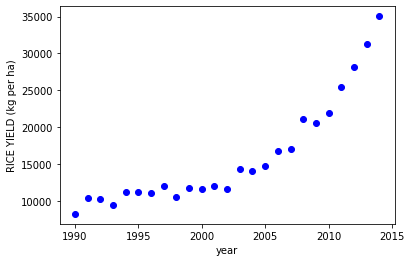

In [5]:
x=[]
y=[]
x_label = "year"
y_label = "RICE YIELD (kg per ha)"
for j in range (start_year, end_year +1):
    mask = (data_all['Year'] == j)
    # x.append(np.sum(np.dot(data_all.loc[mask]["RICE AREA (1000 ha)"],data_all.loc[mask]["prec_growth"])))
    x.append(j)
    # y.append(np.sum(np.dot(data_all.loc[mask]["RICE AREA (1000 ha)"],data_all.loc[mask][y_label])))
    y.append(np.sum(data_all.loc[mask]["nitrogen"]))

# plotting
plt.plot(x, y, 'bo')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

Recording yield data into "y", and values of features into "X": 

In [6]:
y=[]
year=[]

# setting the number of vectors in list X to the number of features
X = []
for j in range (0,len(features)):
  X.append([])

# loading feature data into X
for j in range (start_year, end_year +1):
    mask = (data_all['Year'] == j)
    # x.append(np.sum(np.dot(data_all.loc[mask]["RICE AREA (1000 ha)"],data_all.loc[mask]["prec_growth"])))
    year.append(j)
    for k in range (0,len(features)): # loading values of each feature for given year j
      X[k].append([np.sum(data_all.loc[mask][features[k]])]) # appending sum value of extensive feature k for given year
    state_yield = np.sum(np.dot(data_all.loc[mask]["RICE AREA (1000 ha)"],data_all.loc[mask]["RICE YIELD (kg per ha)"]));
    state_area = np.sum(data_all.loc[mask]["RICE AREA (1000 ha)"]);
    y.append(state_yield/state_area)

# plotting
# plt.plot(X[2], y, 'bo')
# plt.xlabel(features[0])
# plt.ylabel("yield")
# plt.show()

X = np.transpose(X)
X = X[0] # transforms shape X of [25,3,1] tp [25,3]

**Prediction**

Input parameters: a vector of values of features

Output parameter: yield per area unit - scalar quantity


In [17]:
# X = np.array([[1, 1, 1], [1, 2, 2], [2, 2, 3], [2, 3, 5]])
# y = np.dot(X, np.array([1, 2, 3])) + 3
reg = LinearRegression().fit(X, y)
print(reg.predict(np.array([[1067, 749, 46.5]])))
# print(X)

[143.47000425]


Plotting yield vs two features

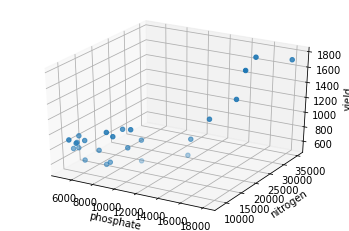

In [55]:
x_feat_num = 3
y_feat_num = 1
ax = plt.axes(projection='3d')
# plt.scatter(np.array(X), y)
# plt.show()
ax.scatter3D(X[:, x_feat_num-1], X[:, y_feat_num-1], y, 'green');
ax.set_xlabel(features[x_feat_num-1])
ax.set_ylabel(features[y_feat_num-1])
ax.set_zlabel('yield')
plt.show()